In [2]:
from time import strptime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure


In [3]:
# Supplementary functions for data parsing and tidying

# Month to int function

def month_str_to_int(month): # convert a month's name to a float number
    try:
        month_num = strptime(month, '%B').tm_mon
    except:
        return None
    return month_num

def week_str_to_int(week): # convert a month's name to a float number
    try:
        week_num = week.strip("week_")
    except:
        return None
    return week_num


def convert_column_to_num_month(df, column_name): #apply month_str_to_int to a whole column
    df = df[column_name]
    df = df.apply(month_str_to_int)
    df = df.apply(lambda x: "{:.0f}".
                  format(x) if not pd.isnull(x) else x) # format as int
    df = df.apply(lambda x: int(x) if not pd.isnull(x) else x)
    return df

def strip_week_column(df, column_name):
    df = df.apply(week_str_to_int)
    df = df.apply(lambda x: "{:.0f}".
                  format(x) if not pd.isnull(x) else x) # format as int
    df = df.apply(lambda x: int(x) if not pd.isnull(x) else x)
    return df
    



def csv_load(file): # suuplementry to load a CSV file and return as df, in the future to be extended
    df = pd.read_csv(file)
    return df

#Correlation creator
## This function shall be used for numeric features only

def plot_correlations(feature1, feature2):
    plt.plot(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


def plot_scatter(feature1, feature2):
    plt.scatter(df[feature1], df[feature2])
    plt.grid()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


In [4]:
# Main build

df = csv_load("Data/feature_data.csv") #Reading the CSV data file
features = df.columns

# Data manipulations

df["order_month"] = convert_column_to_num_month(df, "order_month")

# Part 1: Exploration, Basic Hypothesis

# plot_correlations("changes", "prev_canceled")

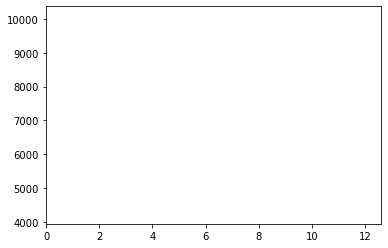

In [7]:
#1 number of orders per month. Conclusion: August is the most...

# plot_scatter("order_year", "time_until_order")
orders_per_month = dict(Counter(df['order_month']))
months = sorted(list(orders_per_month.keys()))
orders_num = [orders_per_month[val] for val in months]
plt.barh(orders_num, months)
plt.show()

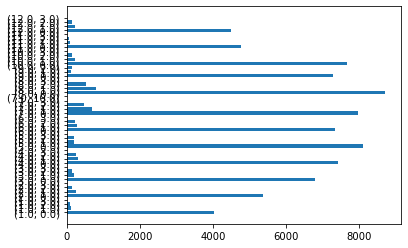

<Figure size 30000x30000 with 0 Axes>

In [11]:
#2 number of children affecting month of order
df2 = df.groupby(['order_month', 'children']).count()
# temo = list(df2.index)
mont = ["".join(str(i)) for i in list(df2.index)]
x = plt.barh(mont, df2['Unnamed: 0'])
plt.figure(figsize=(200, 200), dpi=150)
plt.show()


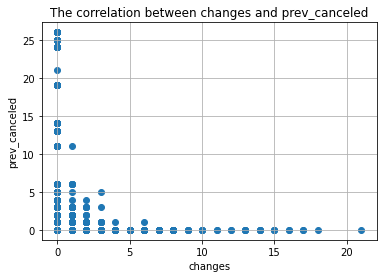

In [12]:
#3
plot_scatter("changes", "prev_canceled")

1.people who deleted their orders more than 20 times.
  family with 10 kids that ordered a hotel
  -those cases are possible but they are outliers, therefore, we won't remove them
  <br>
2. the data isn't scaled.  scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances.
<br>
3. there are 253577 missing values in the dataframe. we chose to ignore a sample with missing data because we thought that plugin any value would ruin the plots accuracy
<br>
4. the problem has more than 30  features for each row. big dimensionality can affect the predictions' accuracy

In [15]:
df.isnull().sum().sum()

253577